# DL LAB-3

### Name: Anushka Khandelwal
### Roll no: E1-06

In [1]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

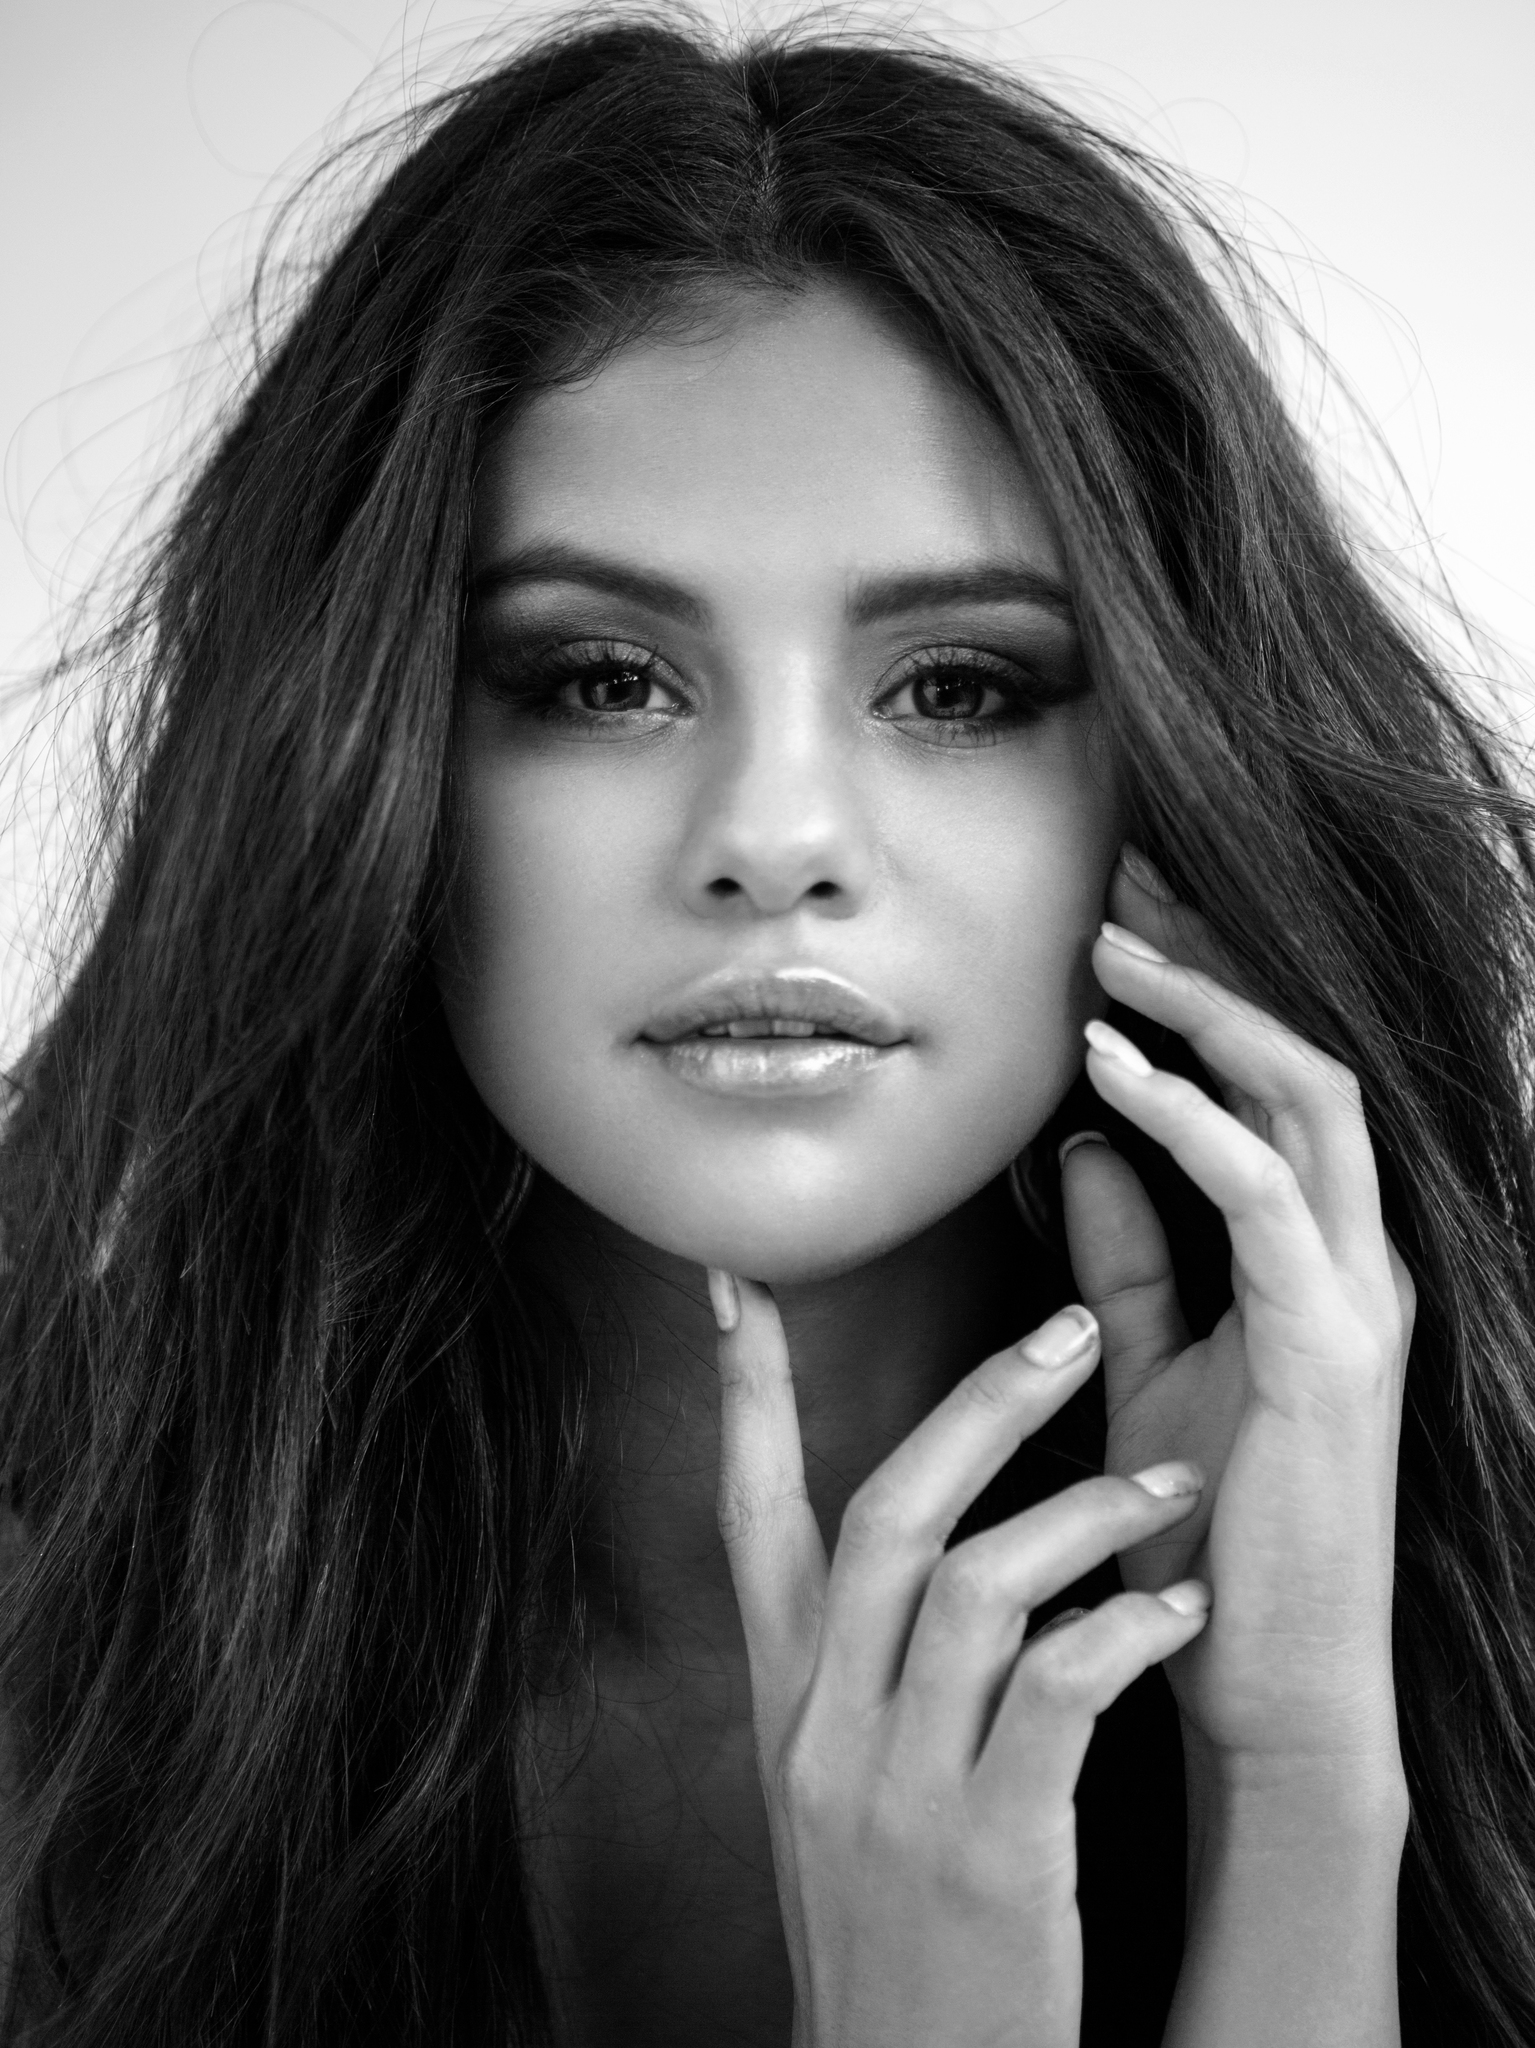

In [2]:
img = cv2.imread("selena.jpg",0)
cv2_imshow(img)

In [3]:
print(img.shape)

(2048, 1535)


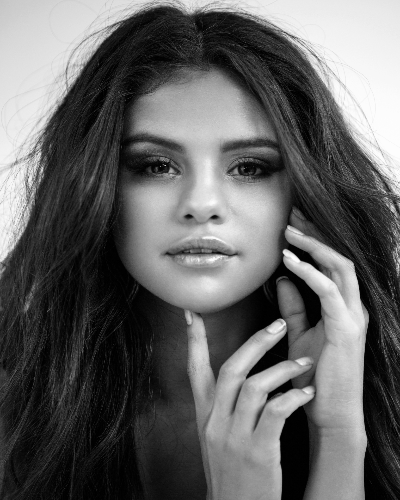

In [4]:
size = (400,500)
cv2_imshow(cv2.resize(img,size))

Number of components explaining 95% variance: 15


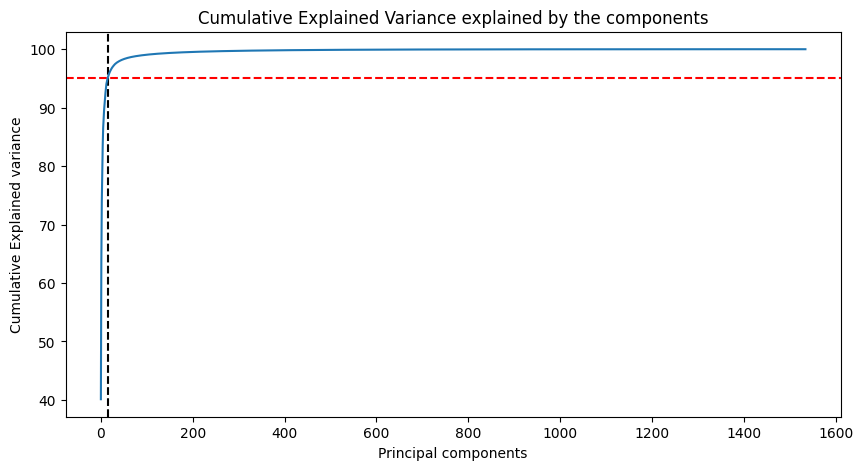

In [5]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(img)
 
# Getting the cumulative variance
 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
 
# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")
 
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


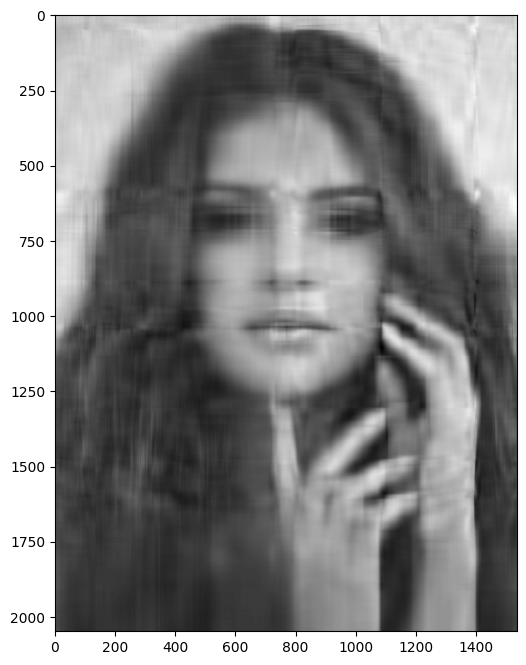

In [6]:
#Reconstructing using Inverse Transform
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(img))
 
# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

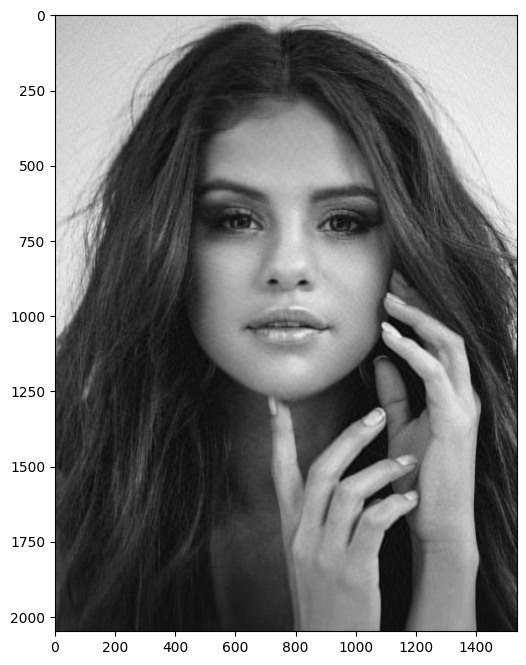

In [7]:
# Function to reconstruct and plot image for a given number of components
 
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(img))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
 
k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

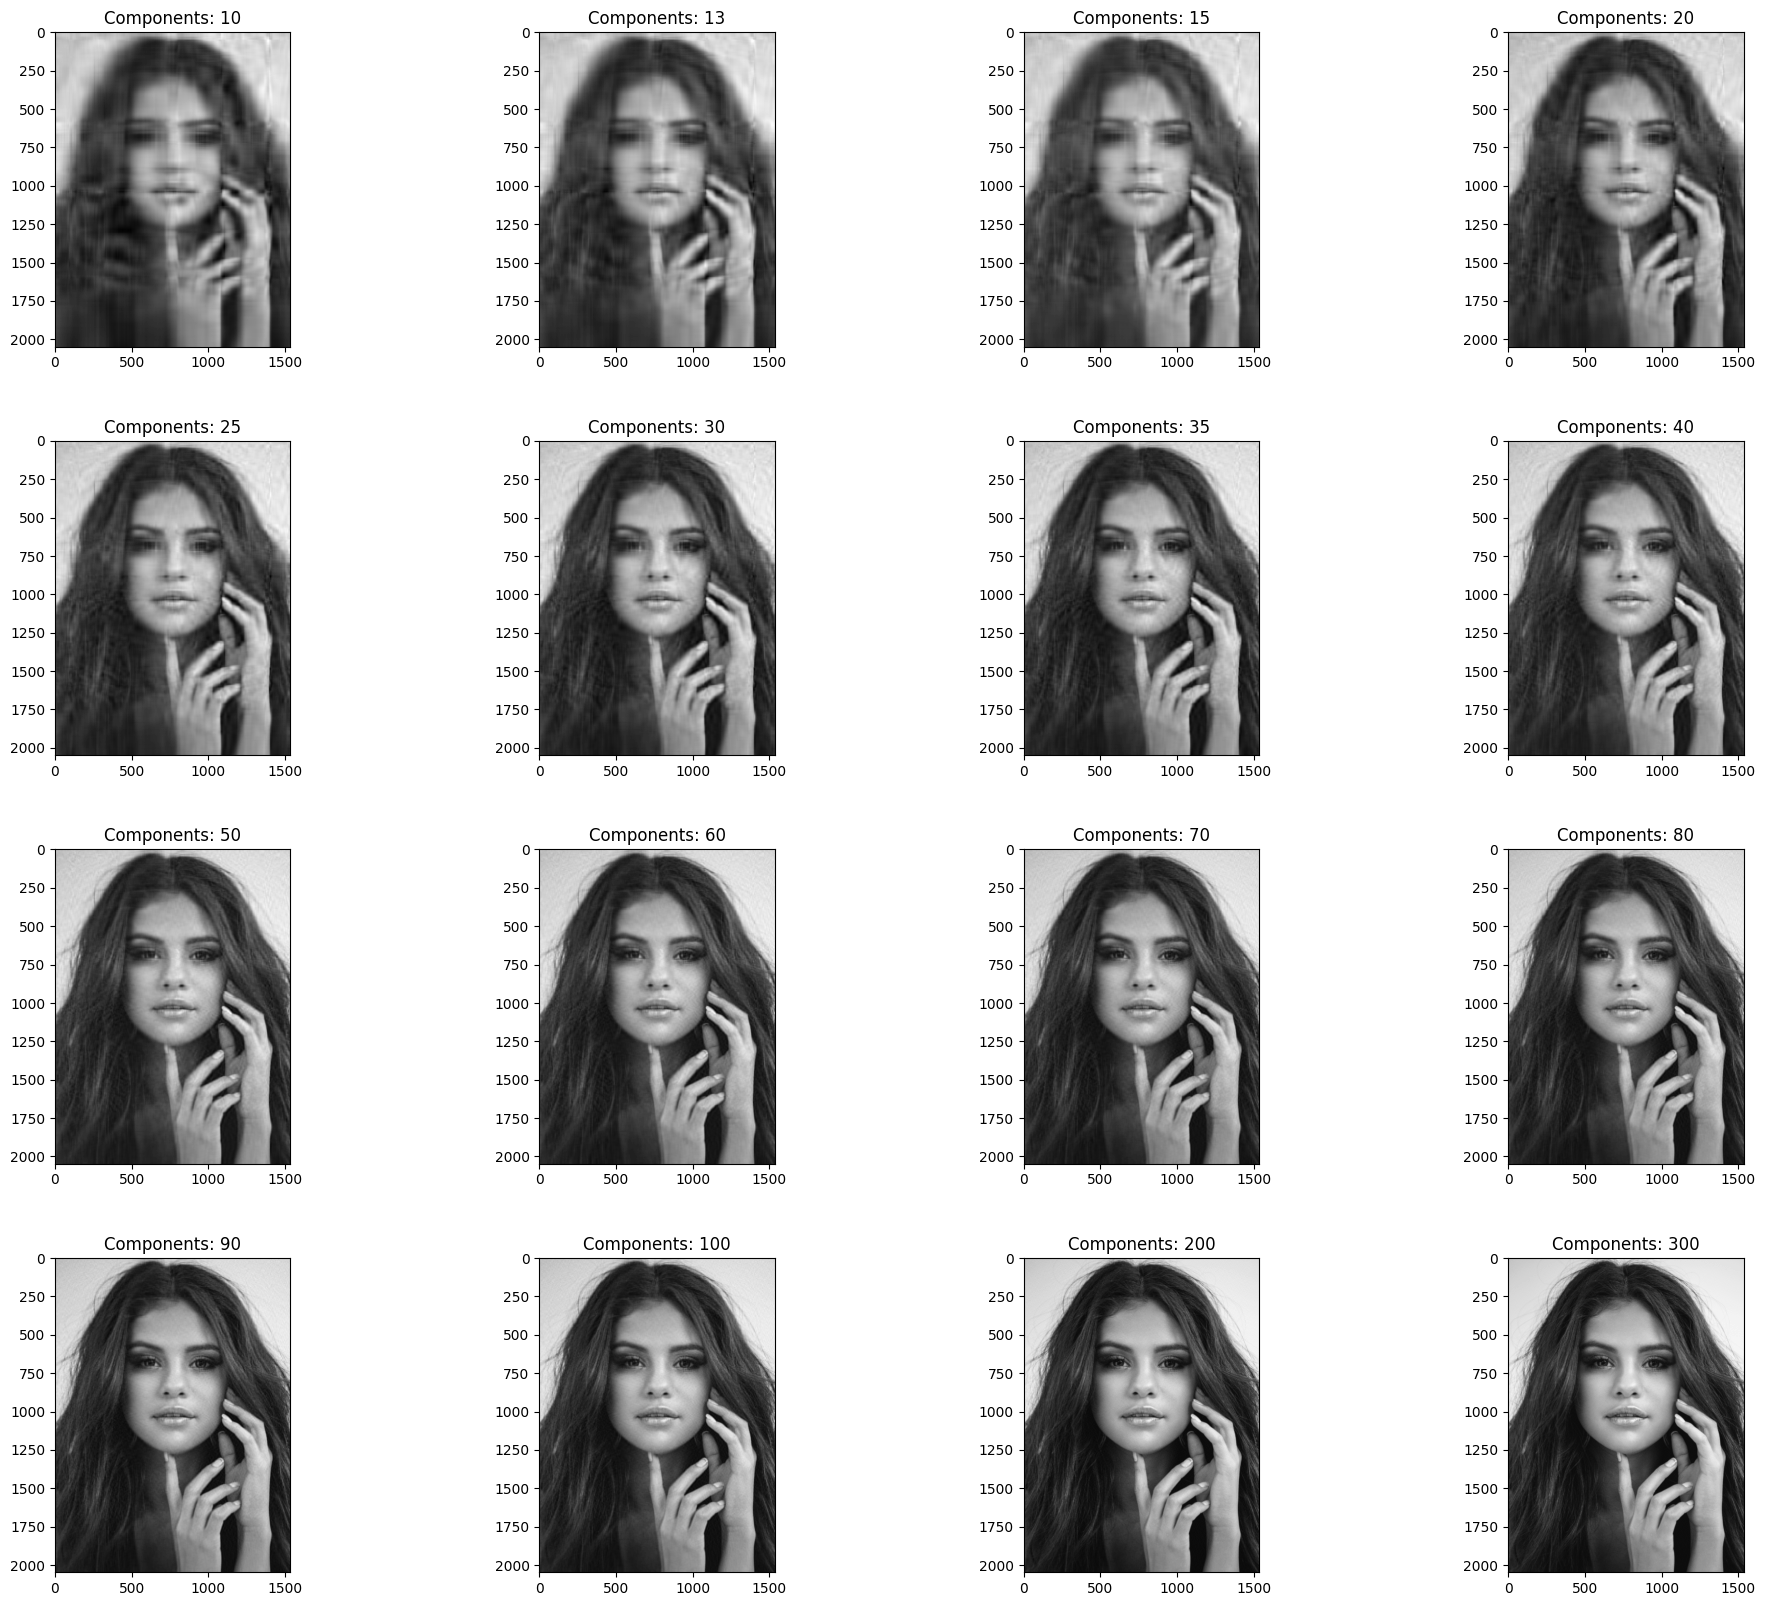

In [8]:
import os

#setting different amounts of K
ks = [10, 13, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 200, 300]
 
plt.figure(figsize=[25,20])
 
for i in range(16):
    plt.subplot(4,4,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

 
plt.subplots_adjust(wspace=0.0, hspace=0.3)
plt.show()